# NHL Game Data Analysis
<strong>Observing the 2012 to 2013 NHL season</strong><br/>
<strong>Authors:</strong> Andre Dallaire &amp; Francis Hackenberger

## Our Data
The data we're interested in analyzing is the __[NHL Game Data](https://www.kaggle.com/martinellis/nhl-game-data)__ from kaggle.  This dataset contains NHL game data for the last 6 years including team and player information. In our case, we're interested in the 2012 to 2013 season. The data is structured as a relational collection of csv files. The relationships between these files can be seen in the image below.<br>
<img src="./data/table_relationships.JPG" style="width:550px"/><br>
This data could have tremendous value for those in involved in the success of NHL teams, fantasy hockey teams, sports networks, or sport analytics overall. These are all high value businesses and are creating demand for better analytics which have led to things like the partnership between the NHL and SAP.

## Import Game Data 
We will be focusing primarily on the primary game data table (2012-2013) however, we will also leverage the team info table in order to get specific team information such as the team names.<br/><br/>
We begin by importing libraries such as pandas, numpy, and matplotlib which will be important in our pursuit of analyzing our data. Next, we read in our focus csv's into pandas dataframes

In [14]:
# Import libraries (pandas, numpy, matplotlib)
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

import warnings warnings.filterwarnings('ignore') # Supress warnings to

# Import game table data into a pandas dataframe
game_df = pd.read_csv('./data/game.csv').fillna(np.nan)

# Import team info table data into a pandas dataframe
team_df = pd.read_csv("./data/team_info.csv").fillna(np.nan)

## Volume of the Data
we have included the shape of both the game and team info tables that we will be utilizing for our analysis.

In [15]:
game_shape = game_df.shape
team_shape = team_df.shape

print("The game dataframe has " + str(game_shape[0]) + " rows and " + str(game_shape[1]) + " columns.")
print("The team dataframe has " + str(team_shape[0]) + " rows and " + str(game_shape[1]) + " columns.")

The game dataframe has 7441 rows and 15 columns.
The team dataframe has 33 rows and 15 columns.


## Formatting and Filtering
That's alot of data. Before we move on to visualizations and tables, we'll filter out the 2012 to 2013 season that we're interested in analyzing as well as removing any trailing whitespace in venue names to make things easier to work with.

In [16]:
# Format and filter data
# Strip away whitespace in venue values
game_df['venue'] = game_df['venue'].map(lambda x: x.strip())

# Filter our dataset on the 2012-2013 NHL season
season2012 = game_df.loc[game_df['season'] == 20122013]

## Observing our data
To begin, we'll transform our data into a more simple dataframe containing only the columns we find most valuable. Which are of course the venues, the team id's, the home goals, and the away goals. We'll also sum up our columns on the home and away goals based on the venue in order to get a stronger overview of the data.

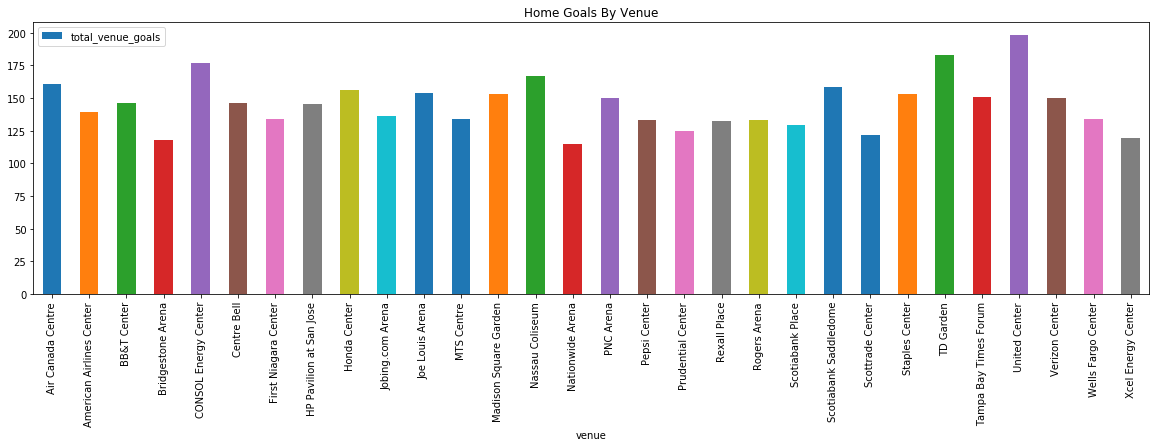

In [17]:
# Home and Away Goals by venue for the 2012-2013 season
goals_2012 = pd.DataFrame(season2012.groupby(['venue', 'home_team_id'])['home_goals', 'away_goals'].sum()).reset_index()
goals_2012['total_venue_goals'] = goals_2012['home_goals'] + goals_2012['away_goals']
goals_2012.plot(x="venue", y="total_venue_goals", kind="bar", figsize=[20,5], title="Home Goals By Venue");

We'll get a better idea of the overall data we're observing by using one of pandas dataframe methods _describe()_, which will give us some useful statistics such as the mean, standard deviation, etc.

In [18]:
goals_2012.describe()

,home_team_id,home_goals,away_goals,total_venue_goals
count,30.000000,30.000000,30.000000,30.000000
mean,16.866667,76.966667,68.066667,145.033333
std,10.991324,15.055033,9.280805,19.503286
min,1.000000,57.000000,51.000000,115.000000
25%,8.250000,65.000000,60.500000,133.000000
50%,16.500000,73.500000,68.500000,145.500000
75%,23.750000,83.000000,73.500000,153.750000
max,52.000000,118.000000,86.000000,198.000000


## Analysis
Notice that there is quite a large discrepency between the standard deviation and the mean goals scored between home and away teams. We'll investigate this further by creating new pandas dataframes based on the home team id and away team ids respectively, once again summing their goals scored.

In [19]:
# Home goals & away goals by team id
home_id_goals = pd.DataFrame(season2012.groupby(['home_team_id'])['home_goals'].sum()).reset_index()

In [20]:
# Home goals & away goals by team id
away_id_goals = pd.DataFrame(season2012.groupby(['away_team_id'])['away_goals'].sum()).reset_index()

We'll introduce our home and away dataframes into our larger goals dataframe and match the team id from the game table to the team name in the team info table in order to generate a plot to represent total the total goals scored by team

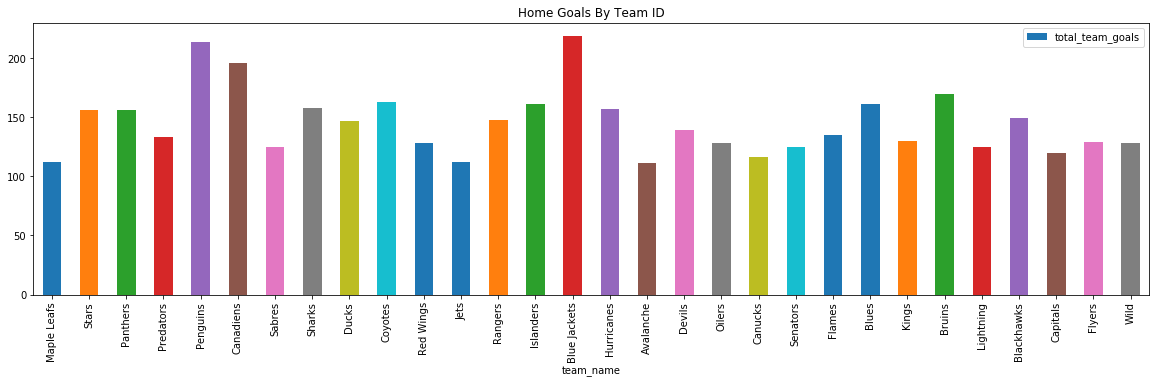

In [21]:
# Create a new index 'total team goals' which is the sum of away goals and home goals
goals_2012["total_team_goals"] = away_id_goals["away_goals"] + home_id_goals["home_goals"]

# Create a new team name index that maps the home team id to the team name in the team info dataset
goals_2012['team_name'] = goals_2012['home_team_id'].map(team_df.set_index('team_id')['teamName'])

# Create a plot to display the total goals for each team
goals_2012.plot(x="team_name", y="total_team_goals", kind="bar", figsize=[20,5], title="Home Goals By Team ID");

Out of curiosity let's examine the correlation between the total goals by team and the total goals by venue.

In [22]:
goals_correlation = goals_2012["total_team_goals"].corr(goals_2012["total_venue_goals"])
print("Correlation between goals scored at a venue and the goals scored by home teams is: {0:05f}".format(goals_correlation))
# Correlation between goals scored at a venue and goals scored by home team over the 2012-2013 NHL season is rather weak.                                                        

Correlation between goals scored at a venue and the goals scored by home teams is: 0.180223


Unfortunately we find that the correlation between the goals scored by venue and the goals scored by each team does not have a particular strong correlation. Let us further examine the two series to see if there may any other information we can gather by creating another plot that will visualize the differences in goals by venue and goals by the home team.

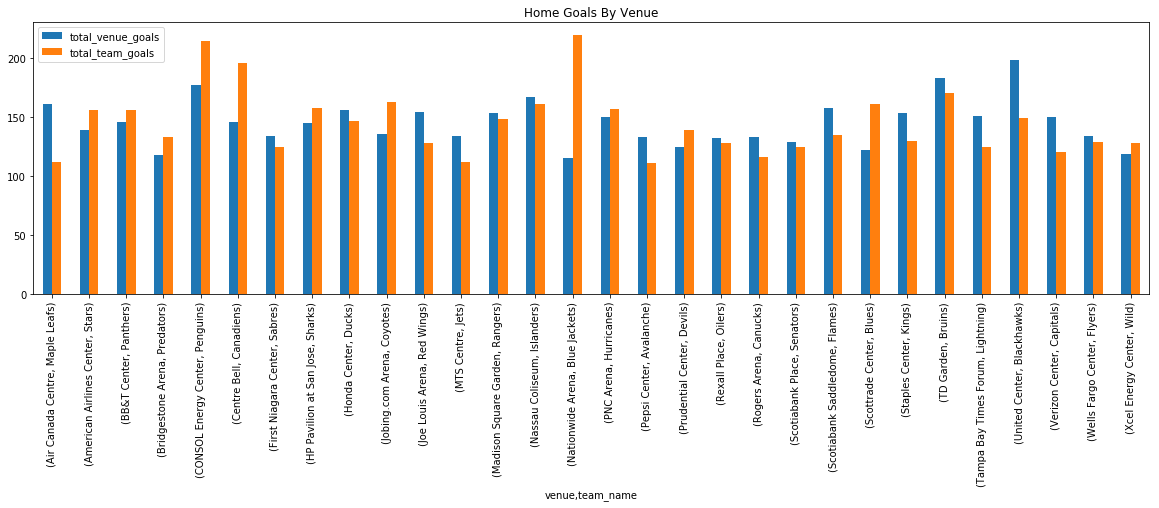

In [23]:
goals_2012.plot(x=["venue", "team_name"], y=["total_venue_goals", "total_team_goals"], kind="bar", figsize=[20,5], title="Home Goals By Venue");

This plot shows that the Nationwide Arena & Blue Jackets are outliers in our data set.
Notice that we have one large outlier in our dataset. The Nationwide Arena venue and the Blue Jackets home team appear to have a much larger gap in home goals scored to venue goals scored. <br/><br/>

We can get a better representation of the correlation between our two datasets if we ommit the outliers (Nationwide Arena & Blue Jackets).

In [24]:
new_correlation = goals_2012["total_team_goals"].drop([14]).corr(goals_2012["total_venue_goals"].drop([14]))
print("Correlation between goals scored at a venue and the goals scored by home teams without the outlier is: {0:05f}".format(goals_correlation))

Correlation between goals scored at a venue and the goals scored by home teams without the outlier is: 0.180223


Wow! We have an enormous increase in positive correlation between our data points.

In [25]:
resulting_correlation = new_correlation - goals_correlation
print("The positive correlation increase is of: {0:05f}".format(resulting_correlation))

The positive correlation increase is of: 0.213660


## Conclusion

After removing our datasets outlier, we were able to observe a _significant_ increase in positive correlation between the goals scored by venue and goals scored by each individual team. This suggests that teams that score alot have home venues where alot of goals are scored.